# Basal Ganglia on SpiNNaker and SpineML 3-Channels

This is a SpineML reproduction of Basab's SpiNNaker implementation of a GPR-like Basal Ganglia model. This notebook pertains to the three channel model.

## Histogram firing rate analysis from spike logs
The following code block defines some functions to visualise the firing rates from running the model. This was taken from my other Izhikevich BG model and so will need some re-writing.

This has been used to analysing the selection experiment in the bgbsb3 3 channel model.


In [2]:
# A global parameter for the length of the sim.
simlength = 10000

In [29]:
# Visualisation of mean firing rates from bg1 simulation, with and without sigmoid.
import numpy as np

# Graph the data. Sub-called by vis_data
def graph_data (bin_edges, fr, logfile):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,8))
    #plt.clf;

    timenums = bin_edges[0:-1]/1000
    
    plt.plot (timenums,fr, '--', color='r', marker='o', label='Channel 1', linewidth=3)

    plt.legend(loc='best',fontsize=14)

    plt.xlabel('t (s)',fontsize=24);
    
    from matplotlib import rc
    plt.ylabel('mean neuronal firing rate (s$^{-1}$)',fontsize=24);
    plt.tick_params(axis='x', labelsize=24, pad=10)
    plt.tick_params(axis='y', labelsize=24, pad=10)
    
    plt.title(logfile)

    graphdir = '/home/seb/models/GPR-BSB/labbook/'

    filename = logfile.replace(' ','_')
    plt.savefig('{0}{1}.svg'.format(graphdir, filename))
    
    plt.show()
    
# Read & precompute the data. Sub-called by vis_data and compute_decision
def compute_data (logdir1, logfile, numneurons, simlength_ms):
    # Read first lot of data
    logpath = logdir1 + logfile
    spikelist = np.genfromtxt (logpath, delimiter=',')
    
    # Give our histograms 10 bins.
    numbins = 10

    ch1fr, bin_edges1 = np.histogram (spikelist[:,0], numbins)

    # There are 20 neurons per channel in this model, 60 total
    num_channels_used = 1
    neuronsPerInvestigation = numneurons * num_channels_used
    
    # Scale the firing rates
    bintime = simlength_ms / numbins;
    fr  = (ch1fr) * 1000 / (bintime * numneurons)

    print bin_edges1
    return bin_edges1, fr
    
# Visualise the given logfile (the log of a single population) 
def vis_data (logdir1, logfile, numneurons, simlength_ms):
    bin_edges, fr = compute_data (logdir1, logfile, numneurons, simlength_ms)
    graph_data (bin_edges, fr, logfile)
    return bin_edges, fr

## end visualisation functions


[  2.80000000e+00   9.99949981e+02   1.99709996e+03   2.99424994e+03
   3.99139992e+03   4.98854990e+03   5.98569988e+03   6.98284986e+03
   7.97999984e+03   8.97714982e+03   9.97429981e+03]


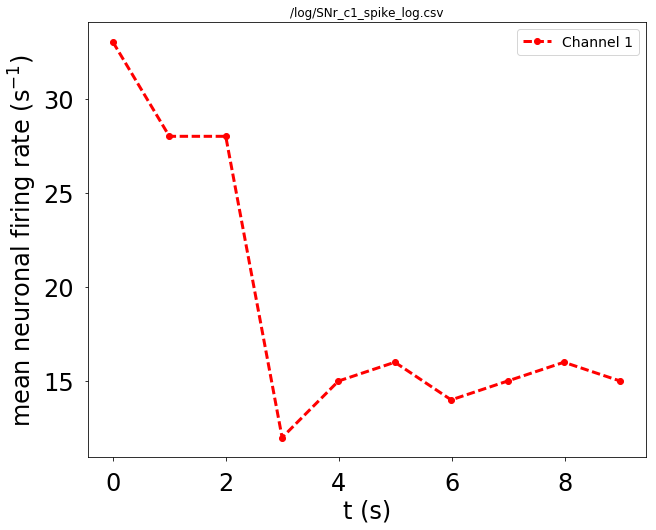

In [30]:
# SNr channel 1 population
bin_edges1, frch1 = vis_data('/home/seb/src/SpineML_2_BRAHMS/temp/Spiking_BG_BSB_3ch_e1','/log/SNr_c1_spike_log.csv', 27, simlength)

[  2.80000000e+00   1.00208006e+03   2.00136012e+03   3.00064018e+03
   3.99992023e+03   4.99920029e+03   5.99848035e+03   6.99776041e+03
   7.99704047e+03   8.99632053e+03   9.99560059e+03]


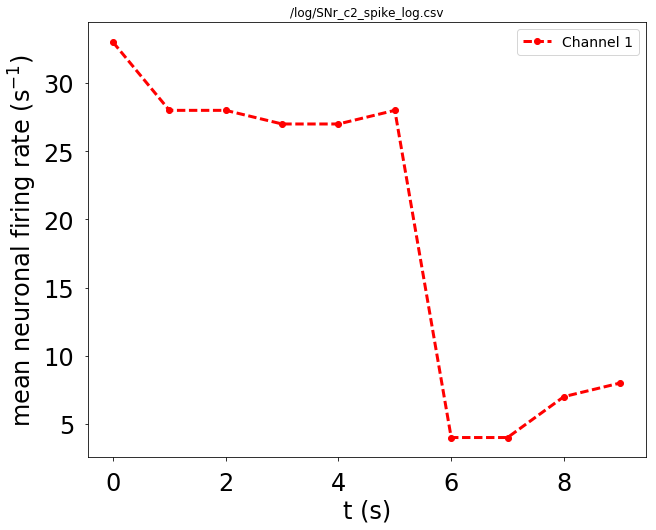

In [31]:
# SNr channel 2 population
bin_edges2, frch2 = vis_data('/home/seb/src/SpineML_2_BRAHMS/temp/Spiking_BG_BSB_3ch_e1','/log/SNr_c2_spike_log.csv', 27, simlength)

[  2.80000000e+00   1.00234002e+03   2.00188004e+03   3.00142006e+03
   4.00096008e+03   5.00050010e+03   6.00004012e+03   6.99958014e+03
   7.99912016e+03   8.99866018e+03   9.99820019e+03]


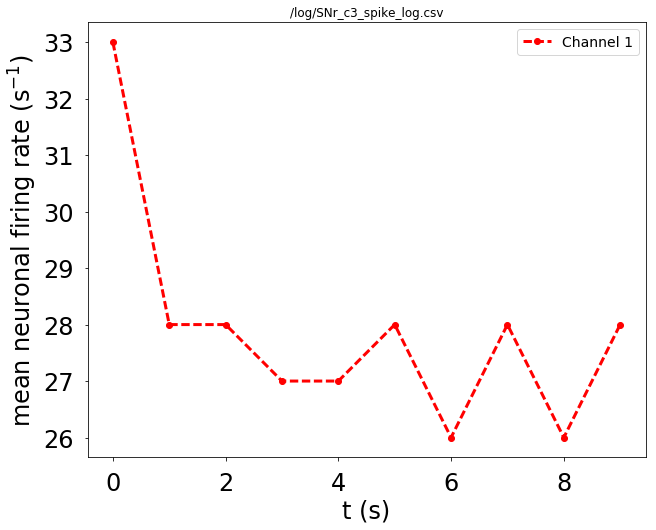

In [32]:
# SNr channel 3 population
bin_edges3, frch3 = vis_data('/home/seb/src/SpineML_2_BRAHMS/temp/Spiking_BG_BSB_3ch_e1','/log/SNr_c3_spike_log.csv', 27, simlength)

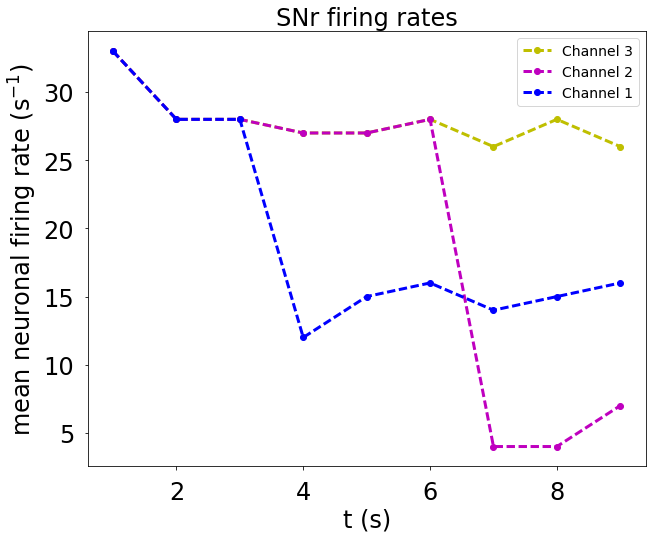

In [35]:
# Graph the results from above

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

timenums = np.linspace(1,9,9)
plt.plot (timenums,frch3[0:-1], '--', color='y', marker='o', label='Channel 3', linewidth=3)
plt.plot (timenums,frch2[0:-1], '--', color='m', marker='o', label='Channel 2', linewidth=3)
plt.plot (timenums,frch1[0:-1], '--', color='b', marker='o', label='Channel 1', linewidth=3)

plt.legend(loc='best',fontsize=14)

plt.xlabel('t (s)',fontsize=24);

from matplotlib import rc
plt.ylabel('mean neuronal firing rate (s$^{-1}$)',fontsize=24);
plt.tick_params(axis='x', labelsize=24, pad=10)
plt.tick_params(axis='y', labelsize=24, pad=10)

plt.title('SNr firing rates', fontsize=24)

graphdir = '/home/seb/models/GPR-BSB/labbook/results/bgbsb3/'

filename = 'bgbsb3_snr'
plt.savefig('{0}{1}.svg'.format(graphdir, filename))

plt.show()

# Save data to csv:
snrrates = timenums
snrrates = np.vstack((timenums,frch1[0:-1],frch2[0:-1],frch3[0:-1]))
np.savetxt(graphdir+'snr_rates.csv', snrrates.T, fmt='%d', delimiter=',', header='t(s),snrc1,snrc2,snrc3', newline='\n')
